<a href="https://colab.research.google.com/github/rafaellabastos/savvyfix-ia-notebook/blob/rm552425/precificacao_dinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SavvyFix - Precificação dinâmica**

<p>2TDSPF</p>

<p>Douglas Magalhães de Araujo - 552008</p>
<p>Gustavo Argüello Bertacci - 551304</p>
<p>Luiz Fillipe Farias - 99519</p>
<p>Rafaella Monique do Carmo Bastos - 552425</p>

# **Dataset**

<p>Fonte: https://www.kaggle.com/code/jeffersonvalandro/analisando-inflacao-brasil/input?select=relatorio_preco_medio_mensal_2023.csv</p>

## Descrição do conjunto de dados
<p>O objetivo desse notebook é criar um modelo de Machine Learning utilizando a técnica de Regressão Linear para demonstrar os prováveis preços dinamizados ao longo dos meses com base nos meses anteriores.</p>
<p>Os dados foram coletados a partir da inflação dos produtos ao longo dos meses do ano de 2023.</p>
<p>Observação: com o tempo, este modelo será alimentado com dados a partir da localização, clima, demanda, procura e horário.</p>

## **Importação das bibliotecas**

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

## **Inicialização do Data Frame**

In [108]:
dados = pd.read_csv('relatorio_preco_medio_mensal_2023.csv')
dados.head()

,Produto/Unidade,Nível de Comercialização,U.F.,01/2023,02/2023,03/2023,04/2023,05/2023,06/2023,07/2023,08/2023,09/2023,10/2023,11/2023,12/2023
0,ABACATE (kg),ATACADO,RR,"6,83","6,67","6,83","7,00","7,00","6,00","6,00","6,60","7,00","7,00","7,00","7,00"
1,ABACAXI HAVAÍ (kg),PRODUTOR,PR,"1,85","2,31","2,30","2,30","2,30",NaN,NaN,NaN,NaN,NaN,"2,60","2,60"
2,ABACAXI (kg),ATACADO,RR,"2,59","2,65","2,79","6,00","8,00","4,50","4,50","4,95","5,00","7,50","7,00","7,50"
3,ABACAXI PÉROLA (6.50 kg),PRODUTOR,DF,"21,80","20,14","23,45","26,65","34,82","36,87","25,47","27,36","28,48","31,92","25,05","25,75"
4,ABACAXI PÉROLA (kg),NaN,AM,"3,81","3,75","3,75","3,90","4,00","4,25","4,02","3,94","4,27","4,25","4,51","4,23"


## **Visualização e tratamento do DataSet**

---



In [109]:
# Quantidade de linhas e colunas do DataFrame
dados.shape

(2029, 15)

In [110]:
# Nomes das colunas
dados.columns

Index(['Produto/Unidade', 'Nível de Comercialização', 'U.F.', '01/2023',
       '02/2023', '03/2023', '04/2023', '05/2023', '06/2023', '07/2023',
       '08/2023', '09/2023', '10/2023', '11/2023', '12/2023'],
      dtype='object')

In [111]:
# Informação do formato de dados das colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Produto/Unidade           551 non-null    object
 1   Nível de Comercialização  309 non-null    object
 2   U.F.                      2024 non-null   object
 3   01/2023                   1901 non-null   object
 4   02/2023                   1902 non-null   object
 5   03/2023                   1874 non-null   object
 6   04/2023                   1874 non-null   object
 7   05/2023                   1884 non-null   object
 8   06/2023                   1879 non-null   object
 9   07/2023                   1852 non-null   object
 10  08/2023                   1781 non-null   object
 11  09/2023                   1765 non-null   object
 12  10/2023                   1706 non-null   object
 13  11/2023                   1603 non-null   object
 14  12/2023                 

In [112]:
# Exclusão de colunas sem importância
dados = dados.drop('Nível de Comercialização', axis=1)
dados = dados.drop('U.F.', axis=1)
dados.head()

,Produto/Unidade,01/2023,02/2023,03/2023,04/2023,05/2023,06/2023,07/2023,08/2023,09/2023,10/2023,11/2023,12/2023
0,ABACATE (kg),"6,83","6,67","6,83","7,00","7,00","6,00","6,00","6,60","7,00","7,00","7,00","7,00"
1,ABACAXI HAVAÍ (kg),"1,85","2,31","2,30","2,30","2,30",NaN,NaN,NaN,NaN,NaN,"2,60","2,60"
2,ABACAXI (kg),"2,59","2,65","2,79","6,00","8,00","4,50","4,50","4,95","5,00","7,50","7,00","7,50"
3,ABACAXI PÉROLA (6.50 kg),"21,80","20,14","23,45","26,65","34,82","36,87","25,47","27,36","28,48","31,92","25,05","25,75"
4,ABACAXI PÉROLA (kg),"3,81","3,75","3,75","3,90","4,00","4,25","4,02","3,94","4,27","4,25","4,51","4,23"


In [113]:
# Exclusão de linhas com valores NaN
dados = dados.dropna()
dados = dados.iloc[:-3]

In [114]:
# Tratamento de valores faltantes
dados.fillna(0, inplace=True)

In [115]:
# Substituição das vírgulas por pontos nas colunas de meses
meses = dados.columns[1:]
for mes in meses:
    dados[mes] = dados[mes].str.replace(',', '.')

In [116]:
# Converção dos dados categóricos para numérico
for mes in meses:
    dados[mes] = pd.to_numeric(dados[mes], errors='coerce')

dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Produto/Unidade  351 non-null    object 
 1   01/2023          347 non-null    float64
 2   02/2023          346 non-null    float64
 3   03/2023          346 non-null    float64
 4   04/2023          346 non-null    float64
 5   05/2023          347 non-null    float64
 6   06/2023          346 non-null    float64
 7   07/2023          346 non-null    float64
 8   08/2023          346 non-null    float64
 9   09/2023          346 non-null    float64
 10  10/2023          346 non-null    float64
 11  11/2023          345 non-null    float64
 12  12/2023          345 non-null    float64
dtypes: float64(12), object(1)
memory usage: 38.4+ KB


In [117]:
# Visualização do DataFrame sem as linhas com NaN
dados.head(20)

,Produto/Unidade,01/2023,02/2023,03/2023,04/2023,05/2023,06/2023,07/2023,08/2023,09/2023,10/2023,11/2023,12/2023
0,ABACATE (kg),6.83,6.67,6.83,7.00,7.00,6.00,6.00,6.60,7.00,7.00,7.00,7.00
2,ABACAXI (kg),2.59,2.65,2.79,6.00,8.00,4.50,4.50,4.95,5.00,7.50,7.00,7.50
3,ABACAXI PÉROLA (6.50 kg),21.80,20.14,23.45,26.65,34.82,36.87,25.47,27.36,28.48,31.92,25.05,25.75
4,ABACAXI PÉROLA (kg),3.81,3.75,3.75,3.90,4.00,4.25,4.02,3.94,4.27,4.25,4.51,4.23
26,ABÓBORA (kg),2.83,2.33,2.50,2.00,3.00,3.00,3.00,3.30,3.50,3.50,3.50,3.50
27,ABOBRINHA (kg),3.00,2.50,3.00,3.00,3.00,2.50,2.50,2.75,3.00,3.00,3.50,3.50
28,AÇAÍ FRUTO (kg),10.00,8.00,7.41,7.50,5.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00
35,ACEROLA (kg),6.50,6.00,6.00,5.00,5.00,6.00,5.00,5.50,5.00,6.00,6.00,6.00
37,AÇÚCAR CRISTAL (20 kg),60.25,59.37,60.25,59.49,59.67,61.41,62.35,64.74,64.74,62.41,65.53,65.56
38,AÇÚCAR CRISTAL (2 kg),6.59,6.51,6.59,6.62,6.65,6.99,7.19,6.88,7.16,7.41,7.32,7.56


## **Análises preliminares**

In [118]:
# Estátistica descritiva
dados.describe()

,01/2023,02/2023,03/2023,04/2023,05/2023,06/2023,07/2023,08/2023,09/2023,10/2023,11/2023,12/2023
count,347.000000,346.000000,346.000000,346.000000,347.000000,346.000000,346.000000,346.000000,346.000000,346.000000,345.000000,345.000000
mean,90.311729,89.408092,90.737803,91.501098,93.865937,89.530058,87.814249,87.232601,86.663757,86.691098,85.410812,88.476870
std,158.321014,154.995433,157.593579,158.153229,164.347058,152.683984,146.443253,148.228055,149.162608,149.757513,144.253449,150.598551
min,0.160000,0.160000,0.180000,0.200000,0.210000,0.210000,0.210000,0.210000,0.210000,0.210000,0.210000,0.220000
25%,5.120000,5.340000,5.462500,5.670000,5.930000,5.350000,5.525000,5.522500,5.977500,6.000000,6.000000,6.000000
50%,21.800000,20.905000,21.565000,22.865000,23.480000,22.335000,23.270000,24.140000,23.905000,23.765000,22.820000,23.240000
75%,116.330000,118.540000,122.280000,118.812500,119.760000,120.280000,120.625000,120.157500,119.382500,122.250000,122.000000,123.000000
max,969.120000,961.290000,955.630000,975.000000,987.810000,884.300000,867.350000,950.550000,985.780000,975.000000,977.270000,986.910000


In [119]:
# Matriz de correlação
remocao = dados.drop('Produto/Unidade', axis=1)
matriz = remocao.corr().round(4)
print(matriz)

         01/2023  02/2023  03/2023  04/2023  05/2023  06/2023  07/2023  \
01/2023   1.0000   0.9960   0.9895   0.9864   0.9893   0.9822   0.9802   
02/2023   0.9960   1.0000   0.9959   0.9937   0.9926   0.9865   0.9848   
03/2023   0.9895   0.9959   1.0000   0.9983   0.9942   0.9888   0.9874   
04/2023   0.9864   0.9937   0.9983   1.0000   0.9959   0.9900   0.9878   
05/2023   0.9893   0.9926   0.9942   0.9959   1.0000   0.9933   0.9900   
06/2023   0.9822   0.9865   0.9888   0.9900   0.9933   1.0000   0.9973   
07/2023   0.9802   0.9848   0.9874   0.9878   0.9900   0.9973   1.0000   
08/2023   0.9825   0.9851   0.9846   0.9845   0.9885   0.9938   0.9962   
09/2023   0.9762   0.9817   0.9825   0.9827   0.9847   0.9907   0.9927   
10/2023   0.9730   0.9789   0.9807   0.9809   0.9818   0.9893   0.9913   
11/2023   0.9799   0.9812   0.9802   0.9817   0.9883   0.9905   0.9917   
12/2023   0.9801   0.9829   0.9805   0.9831   0.9881   0.9875   0.9856   

         08/2023  09/2023  10/2023  1

## **Análises gráficas**

Meses: Index(['01/2023', '02/2023', '03/2023', '04/2023', '05/2023', '06/2023',
       '07/2023', '08/2023', '09/2023', '10/2023', '11/2023', '12/2023'],
      dtype='object')


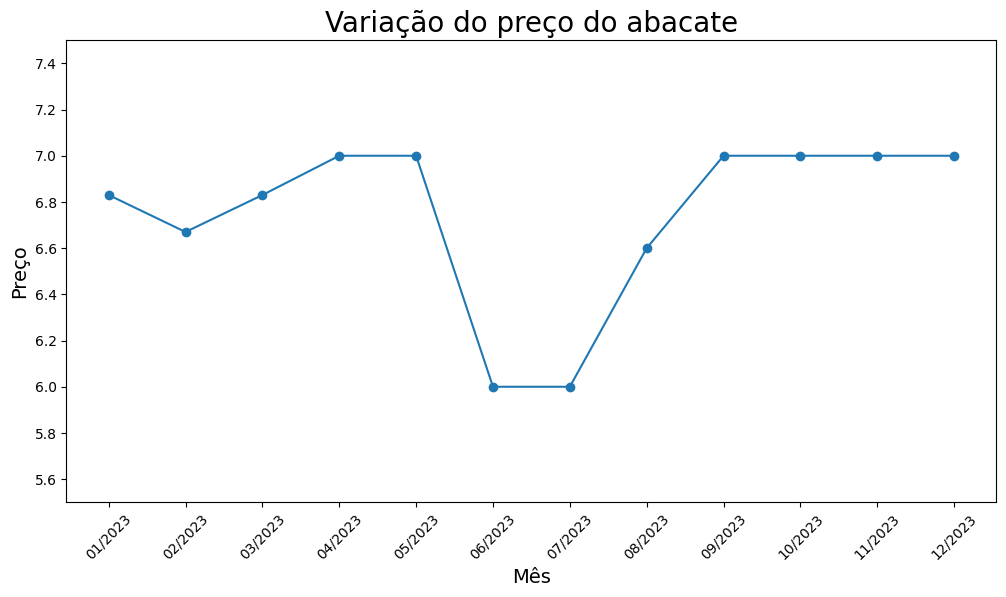

In [140]:
# Criação de um DataFrame com os meses como índices
abacate = dados[dados['Produto/Unidade'] == 'ABACATE (kg)']

# Verificação para que somente os meses sejam incluídos
print("Meses:", meses)

# Obter somente os meses para o eixo x
meses = dados.columns[1:]

# Criação do gráfico
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(meses, abacate.iloc[0, 1:].values.flatten(), marker='o', linestyle='-')

# Configuração de título e rótulos
ax.set_title('Variação do preço do abacate', fontsize=20)
ax.set_xlabel('Mês', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
plt.xticks(rotation=45)

# Definição dos limites e intervalos do eixo y
ax.set_ylim(5.5, 7.5)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))

# Exibição do gráfico
plt.show()